In [31]:
import pymongo
import datetime 
from collections import defaultdict
class Database(object):
    def __init__(self):
        self.connection = pymongo.MongoClient("localhost", 27017)
        self.db = self.connection["DSS4_SmallP"]
        self.mov = self.db["Movie_mojo"]
        self.act = self.db["actor"]
        self.dir = self.db['director']
        self.fra = self.db['franchise']
        
def get_score(name, idt, year):
    idt = idt.split('/')
    idt = datetime.date(int(idt[2])+2000, int(idt[0]), int(idt[1]))
    ytd = datetime.timedelta(days = 365*year)

    score = 0
    for mov in name :
  #      print(mov)
        if len(name[mov]) == 4 :
            if name[mov][2] != 'NA':
                mdt = name[mov][2].split('/')
                mdt = datetime.date(int(mdt[2])+2000, int(mdt[0]), int(mdt[1]))
                if idt - mdt < ytd and datetime.timedelta(0) < idt - mdt:
                    if name[mov][3] != 'NA' :
                        score += name[mov][3]
    return score

db = Database()

In [75]:
movies = db.mov.find({'gross_us' : {'$exists' : 'True'}, 'project_budget' : {'$ne' : 'NA'}})
movies.count()

533

In [2]:
dict_act = {}
actors = db.act.find()
for act in actors:
    dict_act[act['name']] = act['movie']
dict_dir = {}
directors = db.dir.find()
for dire in directors:
    dict_dir[dire['name']] = dire['movie']
dict_fra = {}
franchise = db.fra.find()
for fra in franchise:
    dict_fra[fra['name']] = fra['movie']

In [170]:
actors = db.act.find()
for act in actors:
    mdt = '1/1/13'
    score = get_score(act, mdt)
    print(act['name'], score)

Rhys Ifans 59325658
Will Forte* 0
Alfred Molina 24786984
John Krasinski 8828639
Keira Knightley 44277385
Liev Schreiber 21596472
Alexa Davalos 19243830
Ayelet Zurer 0
Willem Dafoe* 0
Nick Swardson 9239158
Tilda Swinton* 0
Anil Kapoor 0
Kellan Lutz 52519062
Beau Bridges  0
Werner Herzog 5039774
Theo James* 0
Anthony Mackie 226137041
Sandra Oh 0
Mindy Kaling 50163959
Jonah Hill 67210813
Dakota Fanning 30098232
Michael Sheen* 0
Jason Schwartzman 6035259
James Gandolfini 484766
Robert Pattinson 40037724
Sally Hawkins 9172225
Minka Kelly* 0
Taylor Swift  0
RZA* 0
Ellen Burstyn  0
Thomas Dekker 564542
Will Forte 11401610
James Caan*  0
Charlize Theron 43094108
(Voice) 0
Marion Cotillard 91708924
Zach Galifianakis 19029611
Anna Paquin 42180776
Bill Nighy 0
Katee Sackhoff 2548621
Kevin Kline 3427643
Mike Myers 21164006
Catherine Zeta-Jones 0
Michael B Jordan 4524794
Genesis Rodriguez  0
Lea Seydoux 0
Karen Gillan 11928521
Jason Segel* 0
Lukas Haas 57000549
Dane Cook  0
Dave Franco 48064794
Mar

In [66]:
#arr_col = ['Mname','nation','project_budget','genre','grade','release_kor','viewing_time','year']
arr_col = ['Mname','director','franchise','project_budget','actor','grade','release_kor','viewing_time','year','genre','nation', 'gross_us', 'gross_kor']
movies = db.mov.find({'gross_us' : {'$exists' : 'True'}})
data = [] 
for n, line in enumerate(movies):
    movie = defaultdict(lambda: list())
    for key in arr_col :
        if (line[key] == 'NA') or (line[key] == -1):
            line[key] = np.nan
        movie[key] = line[key]
    if type(movie['nation']) == 'list' and u'한국' in movie['nation'] :
        pass
    else :
        score_act = 0
        score_dir = 0
        score_fra = 0
        for it in movie['actor']:
            score_act += get_score(dict_act[it], movie['release_kor'], 5)
        for it in movie['director']:
            score_dir += get_score(dict_dir[it], movie['release_kor'], 5)
        for it in movie['franchise']:
            score_fra += get_score(dict_fra[it], movie['release_kor'], 5)
        movie['score_act'] = score_act
        movie['score_dir'] = score_dir
        movie['score_fra'] = score_fra
        data.append(movie)
df = pd.DataFrame(data)
    
    
    

In [231]:
movies = db.mov.find({'gross_us' : {'$exists' : 'True'}})
genre = set()
for n, line in enumerate(movies):
    for i in line['genre']:
        genre.add(i)

In [234]:
genre = list(genre)

In [246]:
for i in genre:
    print(i)

가족
시대극
스릴러
드라마
애니메이션
전쟁
어드벤처
공포
판타지
미스터리
다큐멘터리
서부
로맨스/멜로
액션
범죄
코미디
무협
SF
뮤지컬


In [7]:
genre = [u'\uac00\uc871',
 u'\uc2dc\ub300\uadf9',
 u'\uc2a4\ub9b4\ub7ec',
 u'\ub4dc\ub77c\ub9c8',
 u'\uc560\ub2c8\uba54\uc774\uc158',
 u'\uc804\uc7c1',
 u'\uc5b4\ub4dc\ubca4\ucc98',
 u'\uacf5\ud3ec',
 u'\ud310\ud0c0\uc9c0',
 u'\ubbf8\uc2a4\ud130\ub9ac',
 u'\ub2e4\ud050\uba58\ud130\ub9ac',
 u'\uc11c\ubd80',
 u'\ub85c\ub9e8\uc2a4/\uba5c\ub85c',
 u'\uc561\uc158',
 u'\ubc94\uc8c4',
 u'\ucf54\ubbf8\ub514',
 u'\ubb34\ud611',
 u'SF',
 u'\ubba4\uc9c0\uceec']

In [67]:
dfn = df.dropna()
dfn = dfn.reset_index()

In [68]:
dummies = pd.DataFrame(np.zeros((len(dfn), len(genre))), columns=genre)
for i, gen in enumerate(dfn.genre):
    for j in gen:
        dummies.ix[i, j] = 1./len(gen)
gen = np.arange(len(genre))
dummies.columns = gen

In [69]:
dfn = dfn.join(dummies.add_prefix('Genre_'))

In [70]:
dfn['ratio'] = dfn['gross_kor'] / (dfn['gross_us'] + dfn['gross_kor'])

In [449]:
dfn.columns

Index([u'index', u'Mname', u'actor', u'director', u'franchise', u'genre',
       u'grade', u'gross_kor', u'gross_us', u'nation', u'project_budget',
       u'release_kor', u'score_act', u'score_dir', u'score_fra',
       u'viewing_time', u'year', u'Genre_0', u'Genre_1', u'Genre_2',
       u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6', u'Genre_7', u'Genre_8',
       u'Genre_9', u'Genre_10', u'Genre_11', u'Genre_12', u'Genre_13',
       u'Genre_14', u'Genre_15', u'Genre_16', u'Genre_17', u'Genre_18',
       u'ratio'],
      dtype='object')

In [71]:
dfx = pd.DataFrame(dfn, columns= [ u'project_budget', u'score_act', u'score_dir', u'score_fra',
    u'Genre_0', u'Genre_1', u'Genre_2', u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6',
    u'Genre_7', u'Genre_8', u'Genre_9', u'Genre_10', u'Genre_11', u'Genre_12',
    u'Genre_13', u'Genre_14', u'Genre_15', u'Genre_16', u'Genre_17', u'Genre_18'])
dfy = pd.DataFrame(dfn, columns = ['ratio'])

In [14]:
dfx

,project_budget,score_act,score_dir,score_fra,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,...,Genre_9,Genre_10,Genre_11,Genre_12,Genre_13,Genre_14,Genre_15,Genre_16,Genre_17,Genre_18
0,210000000.0,35540077,69067774,69067774,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
1,170000000.0,198439173,0,211889228,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0
2,180000000.0,158913784,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,125000000.0,278846895,7719726,11299160,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0
4,200000000.0,357043259,6731002,24995727,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0
5,170000000.0,384888247,0,185525806,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.333333,0.0
6,170000000.0,178579885,989342,17321073,0.000000,0.0,0.250000,0.250000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.0,0.250000,0.0
7,165000000.0,294408687,80698650,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
8,165000000.0,164826467,0,0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.0
9,145000000.0,268936201,25108317,25108317,0.000000,0.0,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0


In [15]:
dfy

,ratio
0,0.150076
1,0.029177
2,0.041458
3,0.016925
4,0.125979
5,0.104081
6,0.127934
7,0.268389
8,0.082982
9,0.113274


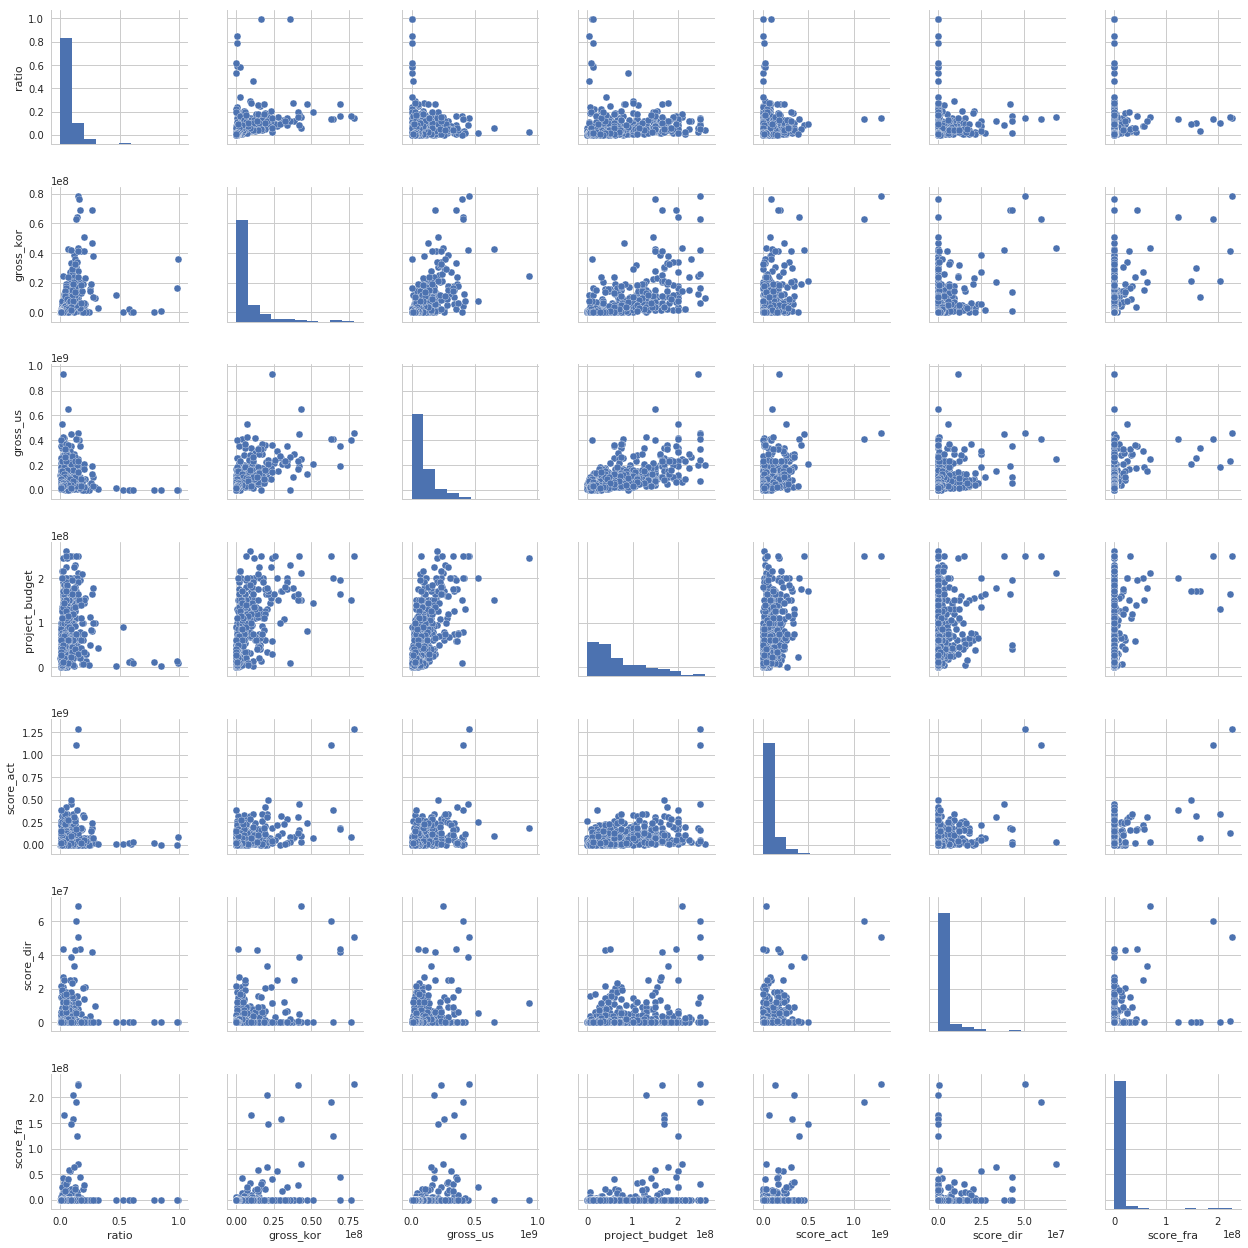

In [373]:
sns.pairplot(dfn, vars=['ratio','gross_kor', 'gross_us', 'project_budget', 'score_act', 'score_dir', 'score_fra'])
plt.tight_layout()
plt.show()

In [72]:
dfb = dfn[dfn['score_dir']!=0]
dfb = dfb[dfb['score_act']!=0]

In [89]:
dfx = pd.DataFrame(dfb, columns= [ u'project_budget', u'score_act', u'score_dir', u'score_fra',
    u'Genre_0', u'Genre_1', u'Genre_2', u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6',
    u'Genre_7', u'Genre_8', u'Genre_9', u'Genre_10', u'Genre_11', u'Genre_12',
    u'Genre_13', u'Genre_14', u'Genre_15', u'Genre_16', u'Genre_17', u'Genre_18'])
dfy = pd.DataFrame(dfb, columns = ['ratio', 'gross_kor'])

In [90]:
dfb

,index,Mname,actor,director,franchise,genre,grade,gross_kor,gross_us,nation,...,Genre_10,Genre_11,Genre_12,Genre_13,Genre_14,Genre_15,Genre_16,Genre_17,Genre_18,ratio
0,5,Transformers: Age of Extinction,"{u'TJ Miller': u'NA', u'Kelsey Grammer': u'/pe...",{u'Michael Bay': u'/people/chart/?view=Directo...,{u'Series: Transformers': u'/franchises/chart/...,[SF],12세이상관람가,43338590.0,245439076.0,[미국],...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.150076
3,9,The Hunger Games: Mockingjay - Part 1,"{u'Donald Sutherland': u'NA', u'Philip Seymour...",{u'Francis Lawrence': u'/people/chart/?view=Di...,{u'Series: The Hunger Games': u'/franchises/ch...,"[액션, 어드벤처]",15세이상관람가,5804110.0,337135885.0,[미국],...,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.016925
4,10,X-Men: Days of Future Past,{u'Omar Sy': u'/people/chart/?view=Actor&id=om...,{u'Bryan Singer': u'/people/chart/?view=Direct...,{u'Series: X-Men': u'/franchises/chart/?id=xme...,"[액션, 어드벤처, 판타지]",12세이상관람가,33716901.0,233921534.0,[미국],...,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.125979
6,12,Dawn of the Planet of the Apes,{u'Gary Oldman': u'/people/chart/?view=Actor&i...,{u'Matt Reeves': u'/people/chart/?view=Directo...,{u'Series: Planet of the Apes': u'/franchises/...,"[SF, 액션, 드라마, 스릴러]",12세이상관람가,30594006.0,208545589.0,[미국],...,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.0,0.250000,0.000000,0.127934
7,14,Interstellar,{u'Matthew McConaughey': u'/people/chart/?view...,{u'Christopher Nolan': u'/people/chart/?view=D...,{},[SF],12세이상관람가,68974677.0,188020017.0,[미국],...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.268389
9,16,How to Train Your Dragon 2,"{u' ': u'NA', u'Christopher Mintz-Plasse': u'N...",{u'Dean DeBlois': u'/people/chart/?view=Direct...,{u'Series: How to Train Your Dragon': u'/franc...,"[애니메이션, 액션, 어드벤처]",전체관람가,22610977.0,177002924.0,[미국],...,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.113274
10,17,American Sniper,"{u'Sienna Miller': u'NA', u'Bradley Cooper': u...",{u'Clint Eastwood': u'/people/chart/?view=Dire...,{},"[액션, 드라마]",청소년관람불가,1922403.0,350126372.0,[미국],...,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.005461
12,19,Rio 2,"{u' ': u'NA', u'Bruno Mars ': u'NA', u'(Voice)...",{u'Carlos Saldanha': u'/people/chart/?view=Dir...,{},"[애니메이션, 어드벤처, 코미디]",전체관람가,5418398.0,131538435.0,[미국],...,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.039563
13,20,Teenage Mutant Ninja Turtles (2014),"{u' ': u'NA', u'(Voice)': u'NA', u'Johnny Knox...",{u'Jonathan Liebesman': u'/people/chart/?view=...,{u'Series: Teenage Mutant Ninja Turtles': u'/f...,"[액션, 어드벤처, 코미디]",12세이상관람가,2592317.0,191204754.0,[미국],...,0.0,0.0,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.000000,0.013376
14,21,The LEGO Movie,"{u' ': u'NA', u'Dave Franco': u'/people/chart/...",{u'Chris Miller': u'/people/chart/?view=Direct...,{u'Series: LEGO': u'/franchises/chart/?id=lego...,"[애니메이션, 액션, 어드벤처]",전체관람가,1433366.0,257760692.0,"[미국, 오스트레일리아, 덴마크]",...,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.005530


In [91]:
dfx = sm.add_constant(dfx)

In [47]:
dfy

,ratio,gross_kor
0,0.150076,43338590.0
3,0.016925,5804110.0
4,0.125979,33716901.0
6,0.127934,30594006.0
7,0.268389,68974677.0
9,0.113274,22610977.0
10,0.005461,1922403.0
12,0.039563,5418398.0
13,0.013376,2592317.0
14,0.005530,1433366.0


In [75]:
model = sm.OLS( dfy['gross_kor'], dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     16.64
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           4.17e-34
Time:                        09:48:32   Log-Likelihood:                -4589.2
No. Observations:                 265   AIC:                             9218.
Df Residuals:                     245   BIC:                             9290.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
project_budget     0.0687      0.012      5.

In [111]:
#dfx['log_bud'] = np.log(dfx['project_budget'])
dfx['log_act'] = np.log(dfx['score_act'])
dfx['log_dir'] = np.log(dfx['score_dir'])
#del dfx['project_budget']
del dfx['score_act']
del dfx['score_dir']

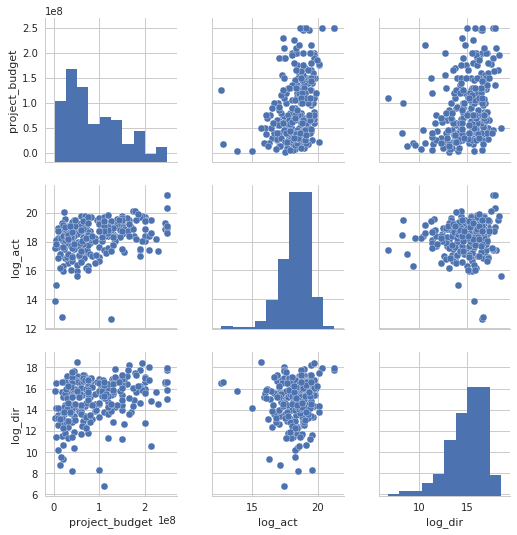

In [114]:
sns.pairplot(dfx, vars=['project_budget', 'log_act', 'log_dir'])
plt.show()

In [115]:
model = sm.OLS( dfy['gross_kor'], dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     14.47
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           2.87e-30
Time:                        10:01:07   Log-Likelihood:                -4599.4
No. Observations:                 265   AIC:                             9239.
Df Residuals:                     245   BIC:                             9310.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
project_budget     0.0748      0.012      6.

In [116]:
corrmat = dfx.join(dfy['gross_kor'])

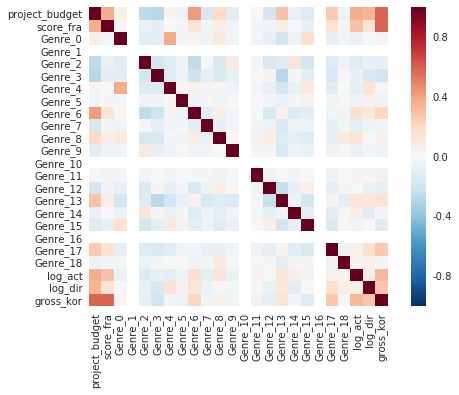

In [117]:
corrmat = corrmat.corr()
sns.heatmap(corrmat, square=1)
plt.show()

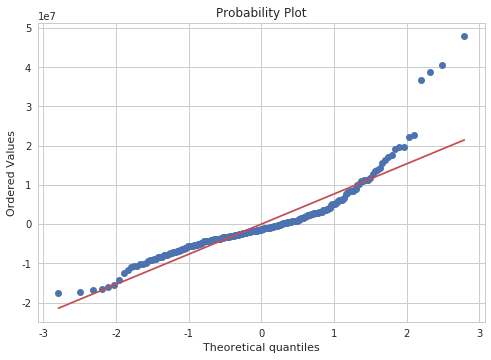

In [118]:
plt.figure()
sp.stats.probplot(result.resid, plot = plt)
plt.show()

In [105]:
df3

,project_budget,score_act,score_dir,score_fra,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,...,Genre_9,Genre_10,Genre_11,Genre_12,Genre_13,Genre_14,Genre_15,Genre_16,Genre_17,Genre_18
0,210000000.0,35540077,69067774,69067774,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
1,125000000.0,278846895,7719726,11299160,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0
2,200000000.0,357043259,6731002,24995727,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0
3,170000000.0,178579885,989342,17321073,0.000000,0.0,0.250000,0.250000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.0,0.250000,0.0
5,145000000.0,268936201,25108317,25108317,0.000000,0.0,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0
6,58800000.0,18986538,993565,0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0
7,103000000.0,251519403,9551872,0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.0
8,125000000.0,306135,15645200,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.0
9,60000000.0,377995772,19954387,0,0.000000,0.0,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0
10,61000000.0,40275951,6325388,0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [119]:
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(dfx)-2)
idx = np.where(cooks_d2 < fox_cr)[0]
print(idx)
df3 = dfx.reset_index(drop = 1).ix[idx,:]
dfy3 = dfy.reset_index(drop = 1).ix[idx, :]
len(idx)

[  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  38  39  40  41  43  44  45  46  47  48  49  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 237 239 240 241 242 243 244
 245 247 249 250 251 252 253 255 256 257 258 259 26

251

In [120]:
model3 = sm.OLS(dfy3['gross_kor'], df3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     14.54
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           8.51e-30
Time:                        10:01:39   Log-Likelihood:                -4271.7
No. Observations:                 251   AIC:                             8583.
Df Residuals:                     231   BIC:                             8654.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
project_budget     0.0669      0.009      7.

project_budget  4.459e+06   5.55e+05      8.036      0.000      3.37e+06  5.55e+06
score_act       1.623e+05   4.33e+05      0.375      0.708     -6.91e+05  1.02e+06
score_dir      -6860.1095   4.26e+05     -0.016      0.987     -8.46e+05  8.32e+05
score_fra       3.594e+06   4.31e+05      8.347      0.000      2.75e+06  4.44e+06
Genre_0         9.945e+06   6.44e+06      1.545      0.124     -2.74e+06  2.26e+07
Genre_1         9.364e-10   6.95e-09      0.135      0.893     -1.28e-08  1.46e-08
Genre_2         6.938e+06    1.5e+06      4.640      0.000      3.99e+06  9.88e+06
Genre_3         6.328e+06    1.3e+06      4.863      0.000      3.76e+06  8.89e+06
Genre_4         5.609e+06   3.39e+06      1.653      0.100     -1.08e+06  1.23e+07
Genre_5         3.123e+06   5.53e+06      0.564      0.573     -7.78e+06   1.4e+07
Genre_6         5.247e+06    2.2e+06      2.390      0.018      9.22e+05  9.57e+06
Genre_7         1.071e+07   2.36e+06      4.542      0.00b0      6.07e+06  1.54e+07
Genre_8         4.663e+06   2.59e+06      1.802      0.073     -4.36e+05  9.76e+06
Genre_9         1.107e+07   4.64e+06      2.386      0.018      1.93e+06  2.02e+07
Genre_10        3.467e-09   4.09e-09      0.847      0.398     -4.59e-09  1.15e-08
Genre_11        -5.84e+06   1.08e+07     -0.543      0.588      -2.7e+07  1.54e+07
Genre_12        6.684e+06   2.46e+06      2.713      0.007      1.83e+06  1.15e+07
Genre_13         6.32e+06   1.24e+06      5.096      0.000      3.88e+06  8.76e+06
Genre_14        9.782e+06   3.56e+06      2.749      0.006      2.77e+06  1.68e+07
Genre_15        5.675e+06   2.01e+06      2.820      0.005      1.71e+06  9.64e+06
Genre_16                0          0        nan        nan             0         0
Genre_17        9.587e+06   2.28e+06      4.214      0.000      5.11e+06  1.41e+07
Genre_18        2.073e+06   1.18e+07      0.176      0.860     -2.11e+07  2.53e+07

score_act   1.869e-05      0.007      0.003      0.998        -0.013     0.013
score_dir     -0.0011      0.007     -0.168      0.867        -0.014     0.012
score_fra      0.0178      0.007      2.653      0.009         0.005     0.031
Genre_0        0.1484      0.103      1.435      0.153        -0.055     0.352
Genre_1     3.191e-17   5.43e-17      0.588      0.557      -7.5e-17  1.39e-16
Genre_2        0.0736      0.023      3.163      0.002         0.028     0.119
Genre_3        0.0511      0.020      2.505      0.013         0.011     0.091
Genre_4        0.0468      0.055      0.858      0.392        -0.061     0.154
Genre_5        0.0019      0.089      0.021      0.983        -0.173     0.177
Genre_6        0.0715      0.033      2.142      0.033         0.006     0.137
Genre_7        0.3072      0.037      8.201      0.000         0.233     0.381
Genre_8        0.0563      0.041      1.369      0.172        -0.025     0.137
Genre_9        0.1204      0.074      1.619      0.107        -0.026     0.267
Genre_10    9.074e-18   1.97e-17      0.462      0.645     -2.96e-17  4.78e-17
Genre_11      -0.0744      0.173     -0.430      0.668        -0.415     0.267
Genre_12       0.0698      0.039      1.788      0.075        -0.007     0.147
Genre_13       0.0749      0.020      3.797      0.000         0.036     0.114
Genre_14       0.0983      0.057      1.717      0.087        -0.014     0.211
Genre_15       0.0474      0.032      1.476      0.141        -0.016     0.111
Genre_16            0          0        nan        nan             0         0
Genre_17       0.0908      0.036      2.501      0.013         0.019     0.162
Genre_18       0.0057      0.189      0.030      0.976        -0.366     0.378